**Install Dependencies**
### Installs google-genai package to use Google's Generative AI models.

In [ ]:
%pip install --upgrade --quiet google-genai

**Authenticate Google Account**
### Checks if running in Google Colab and prompts user authentication for Google Cloud.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

In [ ]:
from google import genai
from google.genai import types

**Import Necessary Libraries**
### Imports genai from google to interact with Google's Imagen 3 model.

**Set Google Cloud Project**
### Defines PROJECT_ID to use Google Cloud services and fetches it from the environment if not set manually.

In [6]:
import os

PROJECT_ID = "PROJECT_ID"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

**Define Image Display Function**
### Imports PIL for handling images and creates a function display_image() to show images with set width and height.

In [7]:
import typing

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

**Define Model Versions**
### Specifies two versions of Google Imagen 3 models:
* "imagen-3.0-generate-002" (High-quality)
* "imagen-3.0-fast-generate-001" (Faster generation)



In [8]:
generation_model = "imagen-3.0-generate-002"
generation_model_fast = "imagen-3.0-fast-generate-001"

**Generate First Image**
### Uses the imagen-3 model to generate an image with the prompt:
* "A photorealistic image of the inside of an amethyst crystal on display in a museum"

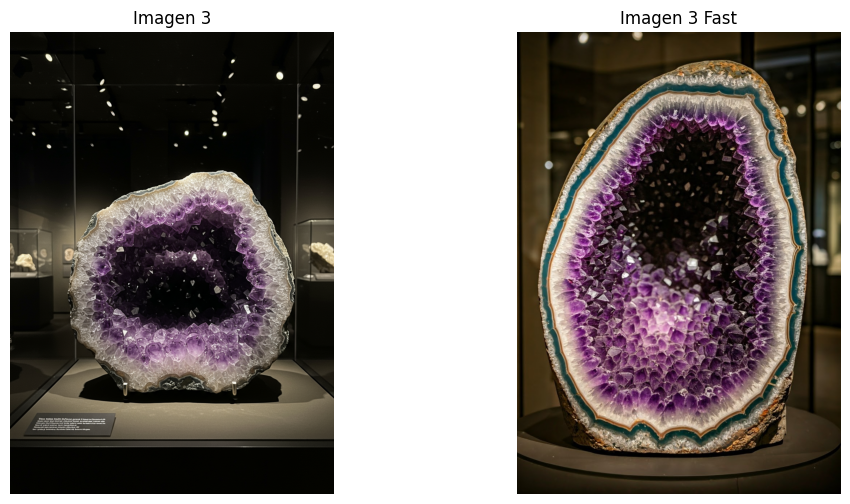

In [16]:
import matplotlib.pyplot as plt

prompt = """
a photorealistic image of the inside of an amethyst crystal on display in a museum
"""

# Imagen 3 image generation
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Imagen 3 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

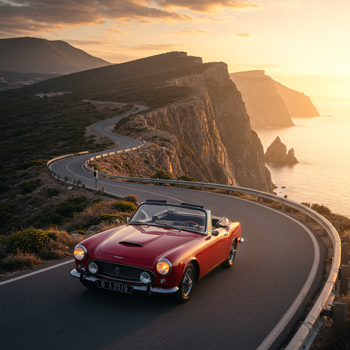

In [18]:
prompt = """
A vintage, red convertible car speeds along a winding cliffside road.
The car is slightly angled, facing towards the viewer, with one wheel slightly off the edge of the road.
The setting sun casts a warm, golden light across the scene, illuminating the car and the dramatic, rocky cliffs.
In the distance, the vast ocean stretches towards the horizon.
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_image(image.generated_images[0].image)

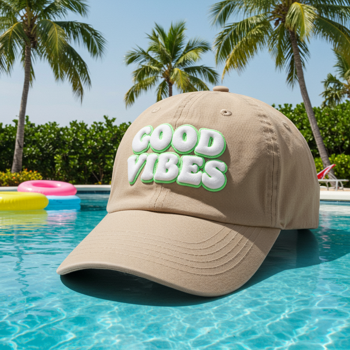

In [19]:
prompt = """
a beige baseball cap with 'good vibes' written on top in white bubbly stitched letters that are outlined in neon green,
display it against a pool background with palm trees and pool floats
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_image(image.generated_images[0].image)